In [27]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [28]:
# df = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv")

In [29]:
# cache data to improve dashboard performance
if 'data' not in pn.state.cache.keys():

    df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

    pn.state.cache['data'] = df.copy()

else: 

    df = pn.state.cache['data']

In [30]:
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.114,0.001,0.001,0.002,0.0,115.59,28.30,0.910,9.486
50594,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.114,0.001,0.001,0.002,0.0,118.22,30.83,0.771,6.537
50595,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.113,0.001,0.001,0.002,0.0,117.96,30.53,0.978,8.795
50596,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.112,0.001,0.001,0.002,0.0,NaN,NaN,1.006,9.481


In [31]:
df[df['country'] == 'North America']

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
33337,North America,1750,NaN,11396206.0,NaN,0.000,0.000,0.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33338,North America,1751,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33339,North America,1752,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33340,North America,1753,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33341,North America,1754,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33604,North America,2017,NaN,581258143.0,NaN,75.813,0.131,6425.781,-47.450,-0.733,...,9.941,22.462,0.052,0.273,0.339,0.014,7418.35,7566.229,386.995,6.023
33605,North America,2018,NaN,585864285.0,NaN,74.562,0.127,6614.565,188.784,2.938,...,8.880,22.313,0.053,0.276,0.343,0.015,7630.50,7777.590,388.395,5.872
33606,North America,2019,NaN,590497015.0,NaN,75.227,0.127,6500.850,-113.715,-1.719,...,9.281,22.162,0.053,0.279,0.346,0.015,7515.65,7663.030,382.097,5.878
33607,North America,2020,NaN,594263186.0,NaN,75.718,0.127,5805.619,-695.230,-10.694,...,9.241,22.009,0.053,0.281,0.349,0.015,NaN,NaN,450.023,7.752


In [32]:
df[df['country'] == 'World']

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
49810,World,1750,NaN,7.456641e+08,NaN,NaN,NaN,9.351,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49811,World,1751,NaN,NaN,NaN,NaN,NaN,9.351,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49812,World,1752,NaN,NaN,NaN,NaN,NaN,9.354,0.004,0.039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49813,World,1753,NaN,NaN,NaN,NaN,NaN,9.354,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49814,World,1754,NaN,NaN,NaN,NaN,NaN,9.358,0.004,0.039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50077,World,2017,NaN,7.599822e+09,1.104307e+14,1507.923,0.198,36096.738,572.547,1.612,...,100.0,100.0,0.394,1.039,1.511,0.078,48251.879,47031.820,0.004,0.0
50078,World,2018,NaN,7.683790e+09,1.136302e+14,1569.218,0.204,36826.508,729.772,2.022,...,100.0,100.0,0.399,1.058,1.536,0.079,49368.039,47980.469,-0.004,-0.0
50079,World,2019,NaN,7.764951e+09,NaN,1617.507,0.208,37082.559,256.049,0.695,...,100.0,100.0,0.404,1.076,1.561,0.081,49758.230,48116.559,0.000,0.0
50080,World,2020,NaN,7.840953e+09,NaN,1637.537,0.209,35264.086,-1818.472,-4.904,...,100.0,100.0,0.410,1.094,1.585,0.082,NaN,NaN,0.000,0.0


## (0) Some minor data preprocessing

In [33]:
# Fill NAs with 0s and create GDP per capita column
df = df.fillna(0)
df['gdp_per_capita'] = np.where(df['population']!= 0, df['gdp']/ df['population'], 0)

In [34]:
# Make DataFrame Pipeline Interactive
idf = df.interactive()

## (1) CO2 emission over time by continent

In [35]:
# Define Panel widgets
year_slider = pn.widgets.IntSlider(name='Year slider', start=1750, end=2020, step=5, value=1850)
year_slider

IntSlider(end=2020, name='Year slider', start=1750, step=5, value=1850)

In [36]:
# Radio buttons for CO2 measures
yaxis_co2 = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['co2', 'co2_per_capita',],
    button_type='success'
)

In [37]:
continents = ['World', 'Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica']

co2_pipeline = (
    idf[
        (idf.year <= year_slider) &
        (idf.country.isin(continents))
    ]
    .groupby(['country', 'year'])[yaxis_co2].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [38]:
co2_pipeline

In [39]:
co2_plot = co2_pipeline.hvplot(x = 'year', by='country', y=yaxis_co2,line_width=2, title="CO2 emission by continent")
co2_plot

## (2) Table - CO2 emission over time by continent 

In [40]:
co2_table = co2_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
co2_table

## (3) CO2 vs GDP scatterplot

In [41]:
co2_vs_gdp_scatterplot_pipeline = (
    idf[
        (idf.year == year_slider) &
        (~ (idf.country.isin(continents)))
    ]
    .groupby(['country', 'year', 'gdp_per_capita'])['co2'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [42]:
co2_vs_gdp_scatterplot_pipeline

In [43]:
co2_vs_gdp_scatterplot = co2_vs_gdp_scatterplot_pipeline.hvplot(x='gdp_per_capita', 
                                                                y='co2', 
                                                                by='country', 
                                                                size=80, kind="scatter", 
                                                                alpha=0.7,
                                                                legend=False, 
                                                                height=500, 
                                                                width=500)
co2_vs_gdp_scatterplot

## (4) Bar chart with CO2 sources by continent

In [44]:
yaxis_co2_source = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['coal_co2', 'oil_co2', 'gas_co2'], 
    button_type='success'
)

continents_excl_world = ['Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica']

co2_source_bar_pipeline = (
    idf[
        (idf.year == year_slider) &
        (idf.country.isin(continents_excl_world))
    ]
    .groupby(['year', 'country'])[yaxis_co2_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [45]:
co2_source_bar_plot = co2_source_bar_pipeline.hvplot(kind='bar', 
                                                     x='country', 
                                                     y=yaxis_co2_source, 
                                                     title='CO2 source by continent')
co2_source_bar_plot

## Creating Dashboard

In [46]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='World CO2 emission dashboard', 
    sidebar=[pn.pane.Markdown("# CO2 Emissions and Climate Change"), 
             pn.pane.Markdown("#### Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions."), 
             pn.pane.PNG('climate_day.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),   
             year_slider],
    main=[pn.Row(pn.Column(yaxis_co2, 
                           co2_plot.panel(width=700), margin=(0,25)), 
                 co2_table.panel(width=500)), 
          pn.Row(pn.Column(co2_vs_gdp_scatterplot.panel(width=600), margin=(0,25)), 
                 pn.Column(yaxis_co2_source, co2_source_bar_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable();

In [47]:
## Creating Regression Model

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [59]:
if 'data' not in pn.state.cache.keys():
    df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')
    pn.state.cache['data'] = df.copy()
else: 
    df = pn.state.cache['data']

In [60]:
# Data preprocessing
df = df.fillna(0)
df['gdp_per_capita'] = np.where(df['population'] != 0, df['gdp'] / df['population'], 0)

In [61]:
# Select relevant columns
data = df[['co2', 'gdp_per_capita']]

In [62]:
# Split the data into training and testing sets
X = data['gdp_per_capita'].values.reshape(-1, 1)
y = data['co2'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
# Create a Linear Regression model
model = LinearRegression()

In [64]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [65]:
# Make predictions on the test set
y_pred = model.predict(X_test)

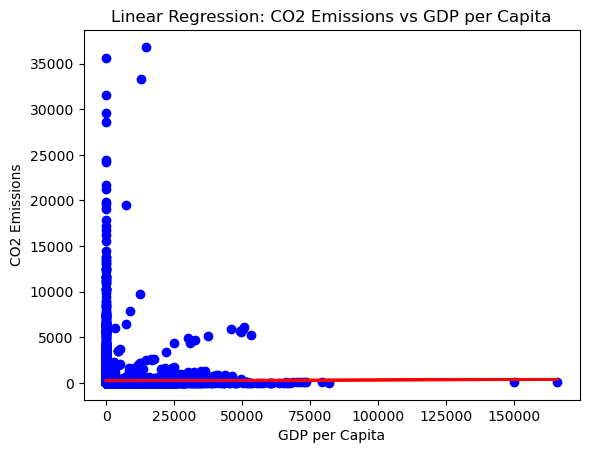

In [67]:
# Visualize the results
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('GDP per Capita')
plt.ylabel('CO2 Emissions')
plt.title('Linear Regression: CO2 Emissions vs GDP per Capita')
plt.show()